# Programming Assignment 2: Integer Linear Programming
## Imports

In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from pulp import *  # pyright: ignore [reportWildcardImportFromLibrary]

## Problem 2

Express the number of warehouses created in terms of the decision variables
$w_0, \ldots, w_{n-1}$. This will give us the objective that we will minimize.
\begin{equation}
\sum_{i=0}^{n-1} w_i
\end{equation}

Write down the constraint that at least one warehouse must be located among
the locations in the set $D_j$.
\begin{equation}
\sum_{i \in D_j} w_i \geq 1, \qquad j = 0, \ldots, n-1
\end{equation}

In [2]:
def euclidean_distance(location_coords, i, j):
    assert 0 <= i < len(location_coords)
    assert 0 <= j < len(location_coords)
    (xi, yi) = location_coords[i]
    (xj, yj) = location_coords[j]
    return ((xj - xi) ** 2 + (yj - yi) ** 2) ** (1 / 2)


def solve_warehouse_location(location_coords, R):
    assert R > 0, "radius must be positive"

    # Decision variables
    n = len(location_coords)
    decision_vars = [LpVariable(f"w{i}", lowBound=0, upBound=1, cat=LpInteger) for i in range(n)]

    # Objective
    prob = LpProblem("Warehouselocation", LpMinimize)
    prob += lpSum(decision_vars)

    # Add constraints
    distances = [[euclidean_distance(location_coords, i, j) for j in range(n)] for i in range(n)]
    for j in range(n):
        dj = filter(lambda i: distances[i][j] <= R, range(n))
        prob += lpSum(decision_vars[i] for i in dj) >= 1

    # Solve problem and return result
    prob.solve()
    return [i for i in range(n) if decision_vars[i].varValue > 0]  # pyright: ignore [reportOptionalOperand]

In [3]:
def check_solution(location_coords, R, warehouse_locs):
    # For each location i, calculate all locations j within distance R of location i.
    # Use list comprehension instead of accumulating using a nested for loop.
    n = len(location_coords)
    assert all(0 <= j < n for j in warehouse_locs), f"Warehouse locations must be between 0 and {n - 1}"
    neighborhoods = [
        [j for j in range(n) if euclidean_distance(location_coords, i, j) <= R] for i in range(n)
    ]
    w = set(warehouse_locs)
    for i, n_list in enumerate(neighborhoods):
        assert any(
            j in w for j in n_list
        ), f"Location #{i} has no warehouse within distance {R}. The locations within distance {R} are {n_list}"
    print("Your solution passed test")


def visualize_solution(location_coords, R, warehouse_locs):
    n = len(location_coords)
    x_coords, y_coords = zip(*location_coords)
    warehouse_x, warehouse_y = [x_coords[j] for j in warehouse_locs], [y_coords[j] for j in warehouse_locs]
    _, ax = plt.subplots()
    ax.set_aspect("equal")
    plt.scatter(x_coords, y_coords)
    for j in warehouse_locs:
        circ = Circle(location_coords[j], R, alpha=0.5, color="g", ls="--", lw=2, ec="k")
        ax.add_patch(circ)
    for i in range(n):
        ax.annotate(f"{i}", location_coords[i])
    plt.scatter(warehouse_x, warehouse_y, marker="x", c="r", s=30)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/woitek/.local/share/virtualenvs/coursera_linear_programming-sQGDHXUS/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/0f10e3e8d562470aba1337f11f733bab-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/0f10e3e8d562470aba1337f11f733bab-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 62 RHS
At line 71 BOUNDS
At line 80 ENDATA
Problem MODEL has 8 rows, 8 columns and 24 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4 - 0.00 seconds
Cgl0004I processed model has 4 rows, 4 columns (4 integer (2 of which binary)) and 10 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 4
Cbc0038I Cleaned solution of 4
Cbc0038I Before mini branch and bound, 4 integ

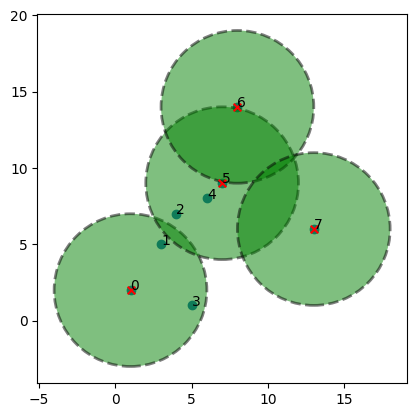

In [4]:
location_coords = [(1, 2), (3, 5), (4, 7), (5, 1), (6, 8), (7, 9), (8, 14), (13, 6)]
R = 5
locs = solve_warehouse_location(location_coords, R)
print(f"Your code returned warehouse locations: {locs}")
assert (
    len(locs) <= 4
), f"Error: There is a solution involving just 4 locations whereas your code returns {len(locs)}"
visualize_solution(location_coords, R, locs)
check_solution(location_coords, R, locs)

R = 2 Test:
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/woitek/.local/share/virtualenvs/coursera_linear_programming-sQGDHXUS/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/4f94e37b5fa54d6f8da6d1c54c14f124-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/4f94e37b5fa54d6f8da6d1c54c14f124-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 16 COLUMNS
At line 95 RHS
At line 107 BOUNDS
At line 119 ENDATA
Problem MODEL has 11 rows, 11 columns and 45 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4 - 0.00 seconds
Cgl0004I processed model has 9 rows, 9 columns (9 integer (8 of which binary)) and 37 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 4
Cbc0038I Cleaned solution of 4
Cbc0038I Before mini branch an

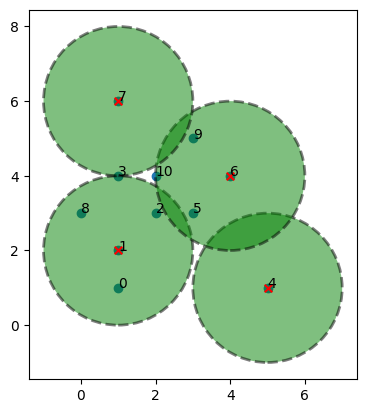

In [5]:
location_coords = [(1, 1), (1, 2), (2, 3), (1, 4), (5, 1), (3, 3), (4, 4), (1, 6), (0, 3), (3, 5), (2, 4)]

# Test 1
print("R = 2 Test:")
R = 2
locs = solve_warehouse_location(location_coords, R)
print(f"Your code returned warehouse locations: {locs}")
assert (
    len(locs) <= 4
), f"Error: There is a solution involving just 4 locations whereas your code returns {len(locs)}"
visualize_solution(location_coords, R, locs)
check_solution(location_coords, R, locs)
print("Test with R = 2 has passed")

R = 3 Test:
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/woitek/.local/share/virtualenvs/coursera_linear_programming-sQGDHXUS/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/6b1ba021ddd547da8757c00ee2ada1b3-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/6b1ba021ddd547da8757c00ee2ada1b3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 16 COLUMNS
At line 127 RHS
At line 139 BOUNDS
At line 151 ENDATA
Problem MODEL has 11 rows, 11 columns and 77 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2 - 0.00 seconds
Cgl0004I processed model has 10 rows, 10 columns (10 integer (9 of which binary)) and 64 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 2
Cbc0038I Cleaned solution of 2
Cbc0038I Before mini branc

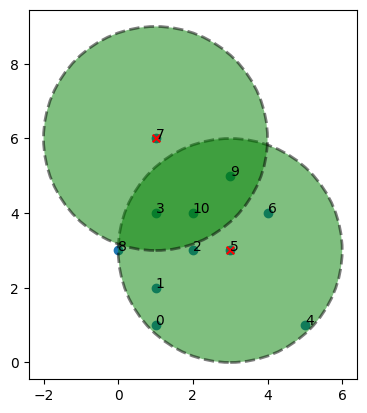

In [6]:
# Test 2
print("R = 3 Test:")
R = 3
locs = solve_warehouse_location(location_coords, R)
print(f"Your code returned warehouse locations: {locs}")
assert (
    len(locs) <= 2
), f"Error: There is a solution involving just 2 locations whereas your code returns {len(locs)}"
visualize_solution(location_coords, R, locs)
check_solution(location_coords, R, locs)
print("Test with R = 3 has passed")